## Soluciones ejercicios

In [59]:
import numpy as np
import matplotlib.pyplot as pl

1. Practicaremos ajustar con polyfit y de paso repasamos cosas dadas en anteriores clases:

* Define un polinomio de orden 3 usando numpy.poly1d o definiendo la función:               
 
* Simula unos datos, alrededor de 20 puntos con:
   - x  números aleatorios entre -10 y 10  siguiendo una distribución uniforme. 
   - y = pol(x, a, b, c) con a,b y c que quierea + un ruido Gaussiano con un ruido Gaussiano con dispersion=25
 
* Haz un ajuste usando polyfit, compara valores que obtienes con los que has metido.  

* Haz plot de los datos y del ajuste. (Recuerda poner la leyenda)

* Calcula el $\chi^2$ de tu ajuste (mira la equación en la teoría) y calcula P(X>x) usando la función de distribución de $\chi^2$ con los grados de libertad de este problema (usa scipy.stats.chi2, (P(X>x) = 1-P(X<=x).) 

* Muestra en un plot la distribución $\chi^2$ con una línea vertical con el valor que obtienes del ajuste. 

In [68]:
# definimos polinomio
pol = np.poly1d([-1,2,3,10])  # pol = ax^3 + bx^2 + cx + d

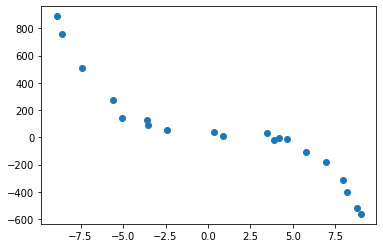

In [69]:
# Generamos set de datos
x = np.random.uniform(-10, 10, 20)
sig = np.random.normal(0,25,20)
y = pol(x) + sig

# Visualizamos
pl.scatter(x,y);

In [70]:
par = np.polyfit(x, y, 3)
print('Valores ajuste', np.round(par,2))
print('Valores iniciales', [3,4,2,1]) 
# genero un objeto que es la función polinomio
# con estos parametros para ahorrarme escribirlo cada vez


Valores ajuste [-1.02  1.73  3.03 29.92]
Valores iniciales [3, 4, 2, 1]


In [71]:
obj = np.poly1d(par)

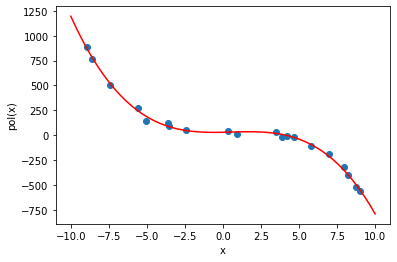

In [72]:
pl.scatter(x, y, label = 'data')
x2 = np.linspace(-10,10,100)
#pl.plot(x2, par[0]*x2**3 + par[1]*x2**2 + par[2]+x2 + par[3],'r')
pl.plot(x2, obj(x2),'r',label = 'fit')  # es lo mismo que arriba, pero escribo menos
pl.xlabel('x')
pl.ylabel('pol(x)');

In [80]:
# defino chi2 con la ecuación de la presentación
def chi2_f(func, x, y, sigma):
    return sum((y - func(x))**2) / sigma**2

#chi2 de nuestro ajuste  
# sigma = 25 que es la dispersion de las y
chi2_min = chi2_f(obj, x,y, 25)

# El número de grados de libertads es Ndata-nparam = 16
from scipy.stats import chi2

print(1 - chi2.cdf(chi2_min,16))
if 1 - chi2.cdf(chi2_min,16) > 0.05:
    print('aceptamos el ajuste')


0.4086656144975276
aceptamos el ajuste


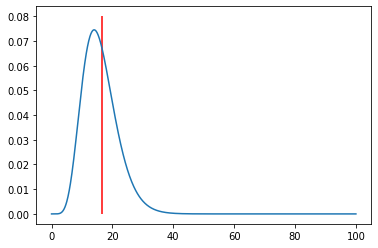

In [94]:
# dibujamos la distribución teórica de chi2
x2 = np.linspace(0,100,1000)
pl.plot(x2, chi2.pdf(x2, 16))

# dibujamos el valor encontrado de chi2 con vlines
pl.vlines(x = chi2_min, ymin = 0, ymax = 0.08, color = 'r')


2. Carga los datos en Data_exp.txt 

* Haz un ajuste usando `curve_fit` suponiendo que la función del modelo es: $ y = ae^{b\sin{fx+\theta}}$

* Haz plot de los datos y del ajuste (con leyenda). 

* Busca el polinomio de grado mínimo que da un buen ajuste para estos datos. (Calcula mse para cada polinomio ajustado)

* Compara los resultados usando el polinomio y la función anterior. 

* Carga los datos extendidos: Data_exp_large.txt y usálo para comprobar si tus modelos se ajustan a los nuevos datos.

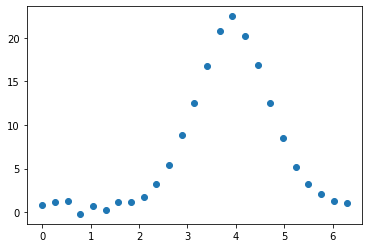

In [97]:
data = np.loadtxt('data/Data_exp.txt')
x = data[:,0]; y = data[:,1]
pl.plot(x, y, 'o', label='data');

los parametros del modelo son [3.54 1.83 1.03 0.68]


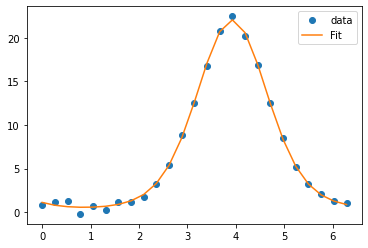

In [109]:
# Para utilizar curve_fit necesitamos definir
# la funciónl
def func(x, a, b, f, phi):
     return a * np.exp(-b * np.sin(f * x + phi))

import scipy.optimize as opt
# hacemos el ajuste
popt,pcov = opt.curve_fit(func, x, y)
print('los parametros del modelo son', np.round(popt,2))  # En popt tenemos los parametros del modelo 
             # en una tupla (a,b,f,phi)
pl.plot(x,y,'o',label='data')
pl.plot(x,func(x,*popt),label='Fit')
pl.legend();



In [113]:
dictPol = {}
for i in range(0,10):
    res = np.polyfit(x,y,i)  # hacemos fit con polinomio grado 1
    Fit = np.poly1d(res)     # definimos objeto polinomio con los
                             # parámetros encontrados en el fit
    mse = np.sum((Fit(x)-y)**2)/len(x)  # calculamos el mse entre los datos 
    dictPol[i] = mse                                      # y y los valores obtenidos con el polinomio
           
# Para hacerlo bien tendríamos que calcular
# el chi2 y compararlo con la distribución teórica para
# cada caso, aquí lo haremos más simple, buscando cuando el
# mse es 0 )
print(min(dictPol, key=dictPol.get))

9


In [114]:
# El primer polinomio donde mse = 0 es 9

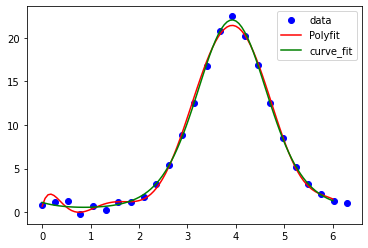

In [119]:
res = np.polyfit(x,y,9)
Fit = np.poly1d(res)
pl.plot(x, y, 'bo', label='data')

# cuando simulamos podemos usar tantos
# números como queramos, podemos tener
# la curva más suave con más números
x2 = np.linspace(0, 6, 100)
pl.plot(x2, Fit(x2),'r', label='Polyfit')
pl.plot(x2, func(x2,*popt), 'g', label='curve_fit')
pl.legend();


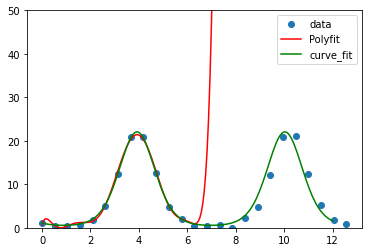

In [131]:
data = np.loadtxt('data/Data_exp_large.txt')
xlarge = data[:,0]; ylarge = data[:,1]
pl.plot(xlarge, ylarge,'o',label='data')

x2 = np.linspace(0,12,200)
pl.plot(x2,Fit(x2),'r',label='Polyfit')
pl.plot(x2, func(x2,*popt), 'g',label='curve_fit')
pl.ylim(0,50) 
pl.legend();

# En los datos extendidos se ve que claramente el polinomio
# se va. Solo nos sirve en el rango del fit.

3. Modifica el siguiente código para mejorar el fit de los datos. Primero hay que encontrar la peculiaridad del modelo y buscar en `help(opt.curve_fit)` o directamente en [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) para resolverlo. 

In [133]:
# Si nos fijamos en este ejercicio, los datos siguen una función distinta
# para distintos rangos 

def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# Generating clean data
x = np.linspace(0, 20, 200)
y1 = func(x[np.where(x <= 10)], 1, 3, 1)
y2 = func(x[(x > 10)], -2, 15, 0.5)

# entonces para hacer el fit tendríamos que hacerlo en
# x>10 y x<10 por separado 
# 
# En el caso de la Gaussiana cabeza abajo, hay que darle unos
# bounds (mirad el help de curve_fit) a los valores porque si 
# no consigue hacer el ajuste.

# no entendí porqué, si alguno lo entiende que lo comparta :)
# biuse@deducedatasolutions.com 
